In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')
 


In [2]:
data=pd.read_table('purchases.txt',parse_dates=[2],header=None)

In [3]:
data.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [4]:
file=data.copy()

In [5]:
file.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
0    51243 non-null int64
1    51243 non-null float64
2    51243 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


# Trend analysis

In [42]:
file1=file.copy()
file2=file.copy()

In [43]:
file2.columns=['CI','VT','DT']

In [44]:
file2.index = file2.DT

In [45]:
file2.head()

,CI,VT,DT
DT,,,
2009-11-06,760,25.0,2009-11-06
2012-09-28,860,50.0,2012-09-28
2005-10-25,1200,100.0,2005-10-25
2009-07-09,1420,50.0,2009-07-09
2013-01-25,1940,70.0,2013-01-25


In [46]:
df_daily = file2.resample('D').mean()
df_daily.head(8)

,CI,VT
DT,,
2005-01-02,7966.666667,46.666667
2005-01-03,NaN,NaN
2005-01-04,9890.000000,25.000000
2005-01-05,NaN,NaN
2005-01-06,12056.666667,90.000000
2005-01-07,12754.285714,61.428571
2005-01-08,12777.500000,75.000000
2005-01-09,NaN,NaN


In [47]:
df_week = file2.resample('W').mean()
df_week.head()

,CI,VT
DT,,
2005-01-02,7966.666667,46.666667
2005-01-09,12271.250000,65.625000
2005-01-16,11651.111111,53.242222
2005-01-23,10661.923077,46.478846
2005-01-30,11656.666667,48.333333


In [48]:
# Resampling to monthly frequency
df_month = file2.resample('M').mean()
df_month.head()

,CI,VT
DT,,
2005-01-31,11278.888889,52.664028
2005-02-28,8250.000000,44.375000
2005-03-31,8460.000000,30.000000
2005-04-30,16636.353383,40.687857
2005-05-31,17850.909091,58.669773


In [49]:
# Resampling to annual frequency
df_year = file2.resample('A-DEC').mean()
df_year.head()

,CI,VT
DT,,
2005-12-31,16562.523810,55.826122
2006-12-31,37390.132906,52.250454
2007-12-31,59349.099273,49.264014
2008-12-31,76958.626183,53.071780
2009-12-31,84253.609023,50.745253


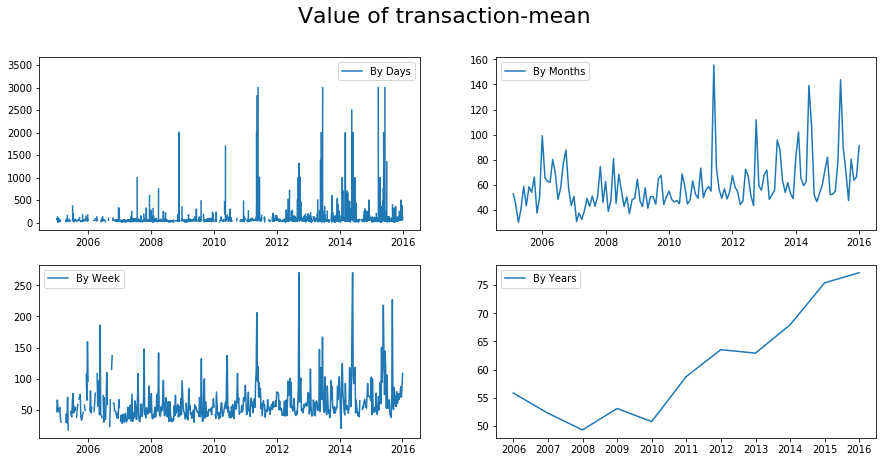

In [50]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Value of transaction-mean', fontsize=22)

plt.subplot(221)
plt.plot(df_daily.VT, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.VT, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_week.VT, '-', label='By Week')
plt.legend()

plt.subplot(224)
plt.plot(df_year.VT, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [30]:
file1['year']=pd.to_datetime(file1[2], format='%m/%d/%Y').dt.year

In [31]:
file1['month']=pd.to_datetime(file1[2], format='%m/%d/%Y').dt.month

In [32]:
file1['date']=pd.to_datetime(file1[2], format='%m/%d/%Y').dt.day

In [33]:
file1['day']=pd.to_datetime(file1[2], format='%m/%d/%Y').dt.dayofweek

In [41]:
file1.columns=['CI','VT','DT','year','month','date','day']

In [42]:
file1.head()

,CI,VT,DT,year,month,date,day
0,760,25.0,2009-11-06,2009,11,6,4
1,860,50.0,2012-09-28,2012,9,28,4
2,1200,100.0,2005-10-25,2005,10,25,1
3,1420,50.0,2009-07-09,2009,7,9,3
4,1940,70.0,2013-01-25,2013,1,25,4


In [ ]:
T=

In [43]:
M=file1.groupby(['month']).sum()['VT']

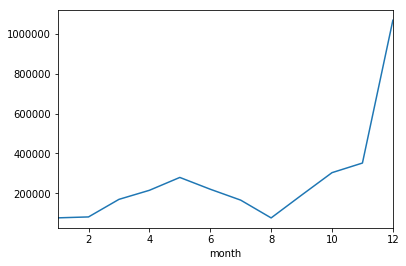

In [45]:
M.plot()

In [46]:
D=file1.groupby(['day']).sum()['VT']

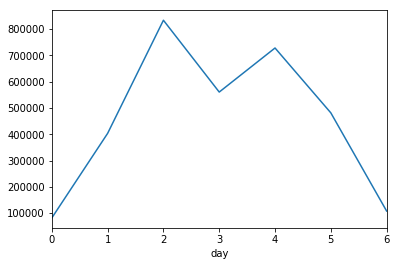

In [47]:
D.plot()

In [48]:
F=file1['VT']

In [49]:
F.index=file1['DT']

In [50]:
F.head()

DT
2009-11-06     25.0
2012-09-28     50.0
2005-10-25    100.0
2009-07-09     50.0
2013-01-25     70.0
Name: VT, dtype: float64

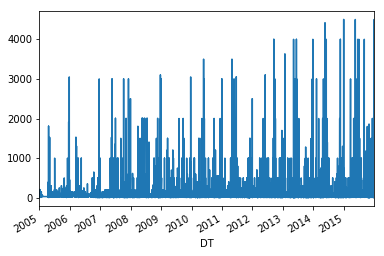

In [51]:
F.plot()

# RFM TABLE

In [7]:
file.columns=['CI','VT','DT']

In [8]:
data.columns=['CI','VT','DT']

In [9]:
data['year']=pd.to_datetime(data['DT'], format='%m/%d/%Y').dt.year

In [10]:
file['CI'].nunique()

18417

In [11]:
file.head()

,CI,VT,DT
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [12]:
file.shape

(51243, 3)

In [13]:
print(file['DT'].min(), file['DT'].max())

2005-01-02 00:00:00 2015-12-31 00:00:00


In [14]:
now = dt.datetime(2016,1,1)
file['hist']=now - file['DT']
file['hist'].astype('timedelta64[D]')
file['hist']=file['hist'] / np.timedelta64(1, 'D')
file['hist1']=file['hist']
file.head()

,CI,VT,DT,hist,hist1
0,760,25.0,2009-11-06,2247.0,2247.0
1,860,50.0,2012-09-28,1190.0,1190.0
2,1200,100.0,2005-10-25,3720.0,3720.0
3,1420,50.0,2009-07-09,2367.0,2367.0
4,1940,70.0,2013-01-25,1071.0,1071.0


In [15]:
file_2014=file.copy()

In [16]:

now = dt.datetime(2015,1,1)
file_2014['hist']=now - file_2014['DT']
file_2014['hist'].astype('timedelta64[D]')
file_2014['hist']=file_2014['hist'] / np.timedelta64(1, 'D')
file_2014['hist1']=file_2014['hist']
file_2014=file_2014[file_2014['hist']>0]

In [17]:
rfmTable = file.groupby('CI').agg({'hist': lambda x:x.min(), # Recency
                                        'hist1': lambda x:x.max(), # First purchase
                                        'CI': lambda x: len(x),               # Frequency
                                        'VT': lambda x: x.mean()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'hist1':'first_purchase',
                         'CI': 'frequency', 
                         'VT': 'monetary_value'}, inplace=True)


In [18]:
rfmTable.head()

,recency,first_purchase,frequency,monetary_value
CI,,,,
10,3829.0,3829.0,1,30.000000
80,343.0,3751.0,7,71.428571
90,758.0,3783.0,10,115.800000
120,1401.0,1401.0,1,20.000000
130,2970.0,3710.0,2,50.000000


In [19]:
rfmTable1 = file.groupby('CI').agg({'hist': lambda x:x.min(), # Recency
                                        'hist1': lambda x:x.max(), # First purchase
                                        'CI': lambda x: len(x),               # Frequency
                                        'VT': lambda x: x.mean()})          # Monetary Value

rfmTable1.rename(columns={'hist': 'recency',
                          'hist1':'first_purchase',
                         'CI': 'frequency', 
                         'VT': 'monetary_value'}, inplace=True)

In [20]:
rfmTable1.head()

,recency,first_purchase,frequency,monetary_value
CI,,,,
10,3829.0,3829.0,1,30.000000
80,343.0,3751.0,7,71.428571
90,758.0,3783.0,10,115.800000
120,1401.0,1401.0,1,20.000000
130,2970.0,3710.0,2,50.000000


# Clustering using K means or Hierarchical

In [316]:
z=rfmTable1.copy()

In [317]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = scale.fit_transform(rfmTable1)

In [318]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [319]:
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init=40)
    km_fit = km.fit(data)
    print(silhouette_score(X=data, labels=km_fit.labels_))

0.3938438915223551
0.4916233193183265
0.5070607863803795
0.4662351244951216
0.4703486296543418
0.4011274497588864
0.3515538939490195
0.40362373420936626


In [320]:
km = KMeans(n_clusters=5,n_init=40)
km_fit = km.fit(data)

In [321]:
z['cluster'] = km_fit.labels_

In [322]:
z.head()

,recency,first_purchase,frequency,monetary_value,cluster
CI,,,,,
10,3829.0,3829.0,1,30.000000,0
80,343.0,3751.0,7,71.428571,2
90,758.0,3783.0,10,115.800000,4
120,1401.0,1401.0,1,20.000000,1
130,2970.0,3710.0,2,50.000000,0


In [323]:
z.groupby(['cluster']).sum()

,recency,first_purchase,frequency,monetary_value
cluster,,,,
0,16172333.0,17858907.0,9804,239898.014286
1,4467331.0,6127563.0,11939,374295.289762
2,1954978.0,7949851.0,14319,160917.548310
3,129082.0,202625.0,304,199669.696400
4,353475.0,4400564.0,14877,89592.857863


# Using Quartiles

In [324]:
a=rfmTable.copy()

In [325]:

rfm1=a.copy()
rfm1.info()
rfm1['frequency']=rfm1['frequency'].astype('float')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 10 to 264200
Data columns (total 4 columns):
recency           18417 non-null float64
first_purchase    18417 non-null float64
frequency         18417 non-null int64
monetary_value    18417 non-null float64
dtypes: float64(3), int64(1)
memory usage: 719.4 KB


In [326]:
rfm1['r_quartile'] = pd.qcut(rfm1['recency'], 4, ['1','2','3','4'])

rfm1['m_quartile'] = pd.qcut(rfm1['monetary_value'], 4, ['4','3','2','1'])

In [327]:
# rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'],duplicates='drop')

In [328]:
rfm1['f_quartile'] =pd.qcut(rfm1['frequency'], 4,['3','2','1'],duplicates='drop')


In [329]:
rfm1.head()

,recency,first_purchase,frequency,monetary_value,r_quartile,m_quartile,f_quartile
CI,,,,,,,
10,3829.0,3829.0,1.0,30.000000,4,3,3
80,343.0,3751.0,7.0,71.428571,2,1,1
90,758.0,3783.0,10.0,115.800000,2,1,1
120,1401.0,1401.0,1.0,20.000000,3,4,3
130,2970.0,3710.0,2.0,50.000000,4,2,3


In [330]:
rfm1['RFM_Score'] = rfm1.r_quartile.astype(str)+ rfm1.f_quartile.astype(str) + rfm1.m_quartile.astype(str)
rfm1.head()

,recency,first_purchase,frequency,monetary_value,r_quartile,m_quartile,f_quartile,RFM_Score
CI,,,,,,,,
10,3829.0,3829.0,1.0,30.000000,4,3,3,433
80,343.0,3751.0,7.0,71.428571,2,1,1,211
90,758.0,3783.0,10.0,115.800000,2,1,1,211
120,1401.0,1401.0,1.0,20.000000,3,4,3,334
130,2970.0,3710.0,2.0,50.000000,4,2,3,432


In [331]:
rfm1.sort_values('RFM_Score', ascending=True).head()

,recency,first_purchase,frequency,monetary_value,r_quartile,m_quartile,f_quartile,RFM_Score
CI,,,,,,,,
60860,1.0,3288.0,10.0,113.500000,1,1,1,111
134220,28.0,1892.0,6.0,716.666667,1,1,1,111
210500,59.0,784.0,4.0,126.250000,1,1,1,111
134180,15.0,2192.0,7.0,185.714286,1,1,1,111
19700,87.0,3852.0,11.0,122.727273,1,1,1,111


# Managerial Segmentation

In [332]:
rfmTable_2015 = file.groupby('CI').agg({'hist': lambda x:x.min(), # Recency
                                        'hist1': lambda x:x.max(), # first purchase
                                        'CI': lambda x: len(x),               # Frequency
                                        'VT': lambda x: x.mean()})          # Monetary Value

rfmTable_2015.rename(columns={'hist': 'recency', 
                              'hist1':'first_purchase',
                         'CI': 'frequency', 
                         'VT': 'monetary_value'}, inplace=True)

In [333]:
rfmTable_2014 = file_2014.groupby('CI').agg({'hist': lambda x:x.min(), # Recency
                                             'hist1': lambda x:x.max(), # first purchase
                                        'CI': lambda x: len(x),               # Frequency
                                        'VT': lambda x: x.mean()})          # Monetary Value

rfmTable_2014.rename(columns={'hist': 'recency', 
                              'hist1':'first_purchase',
                         'CI': 'frequency', 
                         'VT': 'monetary_value'}, inplace=True)

In [334]:
n=rfmTable_2014.copy()

In [335]:
m=rfmTable_2015.copy()

In [336]:
m['segment']=np.nan
n['segment']=np.nan

In [337]:
m.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3829.0,3829.0,1,30.000000,NaN
80,343.0,3751.0,7,71.428571,NaN
90,758.0,3783.0,10,115.800000,NaN
120,1401.0,1401.0,1,20.000000,NaN
130,2970.0,3710.0,2,50.000000,NaN


In [338]:
m.shape

(18417, 5)

In [339]:
n.shape

(16905, 5)

In [340]:
for i in range(0,len(m)):
    if (m.iloc[i,0] > 365*3):
        m.iloc[i,4]='inactive'
    elif (m.iloc[i,0] <= 365*3 and m.iloc[i,0] > 365*2):
        m.iloc[i,4]='cold'
    elif (m.iloc[i,0] <= 365*2 and m.iloc[i,0] > 365*1):
        m.iloc[i,4]='warm'
    elif (m.iloc[i,0]<=365*1):
        m.iloc[i,4]='active'

In [341]:
for i in range(0,len(n)):
    if (n.iloc[i,0] > 365*3):
        n.iloc[i,4]='inactive'
    elif (n.iloc[i,0] <= 365*3 and n.iloc[i,0] > 365*2):
        n.iloc[i,4]='cold'
    elif (n.iloc[i,0] <= 365*2 and n.iloc[i,0] > 365*1):
        n.iloc[i,4]='warm'
    elif (n.iloc[i,0]<=365*1):
        n.iloc[i,4]='active'

In [342]:
customer_2015=m.copy()

In [343]:
customer_2014=n.copy()

In [344]:
customer_2015.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3829.0,3829.0,1,30.000000,inactive
80,343.0,3751.0,7,71.428571,active
90,758.0,3783.0,10,115.800000,cold
120,1401.0,1401.0,1,20.000000,inactive
130,2970.0,3710.0,2,50.000000,inactive


In [345]:
customer_2014.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3464.0,3464.0,1,30.0,inactive
80,302.0,3386.0,6,70.0,active
90,393.0,3418.0,10,115.8,warm
120,1036.0,1036.0,1,20.0,cold
130,2605.0,3345.0,2,50.0,inactive


In [346]:
m.groupby(['segment']).mean()

,recency,first_purchase,frequency,monetary_value
segment,,,,
active,99.740645,1465.843461,4.560763,72.080944
cold,857.781398,1432.117183,2.303205,51.739893
inactive,2178.110832,2546.168377,1.814479,48.112771
warm,489.939734,1319.590398,2.872319,69.562155


In [347]:
n.groupby(['segment']).mean()

,recency,first_purchase,frequency,monetary_value
segment,,,,
active,106.783872,1317.731871,4.307942,70.367896
cold,866.616814,1565.444032,2.254064,51.114605
inactive,2058.441294,2353.036874,1.730964,48.111199
warm,484.588692,1165.073802,2.581787,52.135549


In [348]:
m['segment'].nunique() ,n['segment'].nunique()

(4, 4)

# Managerial segment

In [349]:
m1=m.copy()
n1=n.copy()

In [350]:
m1.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3829.0,3829.0,1,30.000000,inactive
80,343.0,3751.0,7,71.428571,active
90,758.0,3783.0,10,115.800000,cold
120,1401.0,1401.0,1,20.000000,inactive
130,2970.0,3710.0,2,50.000000,inactive


In [351]:
for i in range(0,len(m1)):
    if (m1.iloc[i,1] <= 365*2 and m1.iloc[i,4]=='warm'):
        m1.iloc[i,4]='new warm'
    elif (m1.iloc[i,3] <100 and m1.iloc[i,4]=='warm'):
        m1.iloc[i,4]='warm low value'
    elif (m1.iloc[i,3] >=100 and m1.iloc[i,4]=='warm'):
        m1.iloc[i,4]='warm high value' 
    elif (m1.iloc[i,1] <=365 and m1.iloc[i,4]=='active'):
        m1.iloc[i,4]='new active'
    elif (m1.iloc[i,3] <100 and m1.iloc[i,4]=='active'):
        m1.iloc[i,4]='active low value'
    elif (m1.iloc[i,3] >=100 and m1.iloc[i,4]=='active'):
        m1.iloc[i,4]='active high value' 

In [352]:
m1.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3829.0,3829.0,1,30.000000,inactive
80,343.0,3751.0,7,71.428571,active low value
90,758.0,3783.0,10,115.800000,cold
120,1401.0,1401.0,1,20.000000,inactive
130,2970.0,3710.0,2,50.000000,inactive


In [353]:
count_2015=m1.groupby(['segment']).agg({'segment':['count']})
count_2015_perc=count_2015/18417*100
print(count_2015)
count_2015_perc


                  segment
                    count
segment                  
active high value     573
active low value     3313
cold                 1903
inactive             9158
new active           1512
new warm              938
warm high value       119
warm low value        901


,segment
,count
segment,
active high value,3.111256
active low value,17.988815
cold,10.332845
inactive,49.725797
new active,8.209806
new warm,5.093120
warm high value,0.646142
warm low value,4.892219


In [354]:
m1.groupby(['segment']).mean()

,recency,first_purchase,frequency,monetary_value
segment,,,,
active high value,88.820244,1985.909250,5.888307,240.045740
active low value,108.361002,2003.801992,5.935406,40.724525
cold,857.781398,1432.117183,2.303205,51.739893
inactive,2178.110832,2546.168377,1.814479,48.112771
new active,84.990741,90.013889,1.045635,77.133847
new warm,509.304904,516.622601,1.044776,66.599026
warm high value,455.126050,2015.352941,4.714286,327.407457
warm low value,474.377358,2063.639290,4.531632,38.591926


In [355]:
for i in range(0,len(n1)):
    if (n1.iloc[i,1] <= 365*2 and n1.iloc[i,4]=='warm'):
        n1.iloc[i,4]='new warm'
    elif (n1.iloc[i,3] <100 and n1.iloc[i,4]=='warm'):
        n1.iloc[i,4]='warm low value'
    elif (n1.iloc[i,3] >=100 and n1.iloc[i,4]=='warm'):
        n1.iloc[i,4]='warm high value' 
    elif (n1.iloc[i,1] <=365 and n1.iloc[i,4]=='active'):
        n1.iloc[i,4]='new active'
    elif (n1.iloc[i,3] <100 and n1.iloc[i,4]=='active'):
        n1.iloc[i,4]='active low value'
    elif (n1.iloc[i,3] >=100 and n1.iloc[i,4]=='active'):
        n1.iloc[i,4]='active high value' 

In [356]:
n1.head()

,recency,first_purchase,frequency,monetary_value,segment
CI,,,,,
10,3464.0,3464.0,1,30.0,inactive
80,302.0,3386.0,6,70.0,active low value
90,393.0,3418.0,10,115.8,warm high value
120,1036.0,1036.0,1,20.0,cold
130,2605.0,3345.0,2,50.0,inactive


In [357]:
count_2014=n1.groupby(['segment']).agg({'segment':['count']})
count_2014_perc=count_2014/16905*100
print(count_2014)
count_2014_perc


                  segment
                    count
segment                  
active high value     475
active low value     3011
cold                 2153
inactive             7512
new active           1437
new warm             1250
warm high value       111
warm low value        956


,segment
,count
segment,
active high value,2.809820
active low value,17.811298
cold,12.735877
inactive,44.436557
new active,8.500444
new warm,7.394262
warm high value,0.656610
warm low value,5.655132


In [358]:
n1.groupby(['segment']).mean()

,recency,first_purchase,frequency,monetary_value
segment,,,,
active high value,85.338947,1838.050526,5.696842,261.902155
active low value,98.091000,1796.351378,5.633677,40.459174
cold,866.616814,1565.444032,2.254064,51.114605
inactive,2058.441294,2353.036874,1.730964,48.111199
new active,132.086987,142.871260,1.070981,69.725159
new warm,497.317600,504.880000,1.057600,51.367653
warm high value,461.198198,1878.810811,4.414414,187.849110
warm low value,470.661088,1945.426778,4.361925,37.382060


# COMPUTING REVENUE GENERATION PER SEGMENT

In [376]:
data1=data[data['year']==2015]

In [377]:
rev_2015=data1.groupby(['CI']).agg({'VT':['sum']})

In [378]:
rev_2015.head()

,VT
,sum
CI,
80,80.0
480,45.0
830,50.0
850,60.0
860,60.0


In [379]:
actual = pd.merge(m1,rev_2015,how='left',left_on='CI',right_on='CI',)

In [380]:
actual=actual.fillna(0)
actual.head()  # where (VT, sum) represents revenue 2015

,recency,first_purchase,frequency,monetary_value,segment,"(VT, sum)"
CI,,,,,,
10,3829.0,3829.0,1,30.000000,inactive,0.0
80,343.0,3751.0,7,71.428571,active low value,80.0
90,758.0,3783.0,10,115.800000,cold,0.0
120,1401.0,1401.0,1,20.000000,inactive,0.0
130,2970.0,3710.0,2,50.000000,inactive,0.0


In [381]:
actual.columns

Index([       'recency', 'first_purchase',      'frequency', 'monetary_value',
              'segment',    ('VT', 'sum')],
      dtype='object')

In [382]:
# Show average revenue per customer and per segment 2015
a=actual.groupby(['segment']).mean()   # get mean revenue 2015 according to segment
a

,recency,first_purchase,frequency,monetary_value,"(VT, sum)"
segment,,,,,
active high value,88.820244,1985.909250,5.888307,240.045740,323.568935
active low value,108.361002,2003.801992,5.935406,40.724525,52.306043
cold,857.781398,1432.117183,2.303205,51.739893,0.000000
inactive,2178.110832,2546.168377,1.814479,48.112771,0.000000
new active,84.990741,90.013889,1.045635,77.133847,79.166144
new warm,509.304904,516.622601,1.044776,66.599026,0.000000
warm high value,455.126050,2015.352941,4.714286,327.407457,0.000000
warm low value,474.377358,2063.639290,4.531632,38.591926,0.000000


In [383]:
forward=pd.merge(n1,rev_2015,how='left',left_on='CI',right_on='CI')  # # Merge 2014 customers and 2015 revenue
forward=forward.fillna(0)
forward.head()

,recency,first_purchase,frequency,monetary_value,segment,"(VT, sum)"
CI,,,,,,
10,3464.0,3464.0,1,30.0,inactive,0.0
80,302.0,3386.0,6,70.0,active low value,80.0
90,393.0,3418.0,10,115.8,warm high value,0.0
120,1036.0,1036.0,1,20.0,cold,0.0
130,2605.0,3345.0,2,50.0,inactive,0.0


In [384]:
# Show average revenue per customer and per segment 2014
f=forward.groupby(['segment']).mean() 
f

,recency,first_purchase,frequency,monetary_value,"(VT, sum)"
segment,,,,,
active high value,85.338947,1838.050526,5.696842,261.902155,254.077895
active low value,98.091000,1796.351378,5.633677,40.459174,41.896556
cold,866.616814,1565.444032,2.254064,51.114605,6.108221
inactive,2058.441294,2353.036874,1.730964,48.111199,2.949466
new active,132.086987,142.871260,1.070981,69.725159,31.046625
new warm,497.317600,504.880000,1.057600,51.367653,5.064000
warm high value,461.198198,1878.810811,4.414414,187.849110,114.459459
warm low value,470.661088,1945.426778,4.361925,37.382060,13.494770


# CUSTOMER LIFETIME VALUE

In [385]:
#COMPUTE TRANSITION MATRIX
new_data=pd.merge(n1,m1,how='left',left_on='CI',right_on='CI')
new_data.head()

,recency_x,first_purchase_x,frequency_x,monetary_value_x,segment_x,recency_y,first_purchase_y,frequency_y,monetary_value_y,segment_y
CI,,,,,,,,,,
10,3464.0,3464.0,1,30.0,inactive,3829.0,3829.0,1,30.000000,inactive
80,302.0,3386.0,6,70.0,active low value,343.0,3751.0,7,71.428571,active low value
90,393.0,3418.0,10,115.8,warm high value,758.0,3783.0,10,115.800000,cold
120,1036.0,1036.0,1,20.0,cold,1401.0,1401.0,1,20.000000,inactive
130,2605.0,3345.0,2,50.0,inactive,2970.0,3710.0,2,50.000000,inactive


In [386]:
transition=pd.crosstab(new_data.segment_x, new_data.segment_y)
transition

segment_y,active high value,active low value,cold,inactive,new warm,warm high value,warm low value
segment_x,,,,,,,
active high value,354,2,0,0,0,119,0
active low value,22,2088,0,0,0,0,901
cold,22,200,0,1931,0,0,0
inactive,35,250,0,7227,0,0,0
new active,89,410,0,0,938,0,0
new warm,15,96,1139,0,0,0,0
warm high value,35,1,75,0,0,0,0
warm low value,1,266,689,0,0,0,0


In [387]:
transition1=transition.copy()

In [388]:
transition1.insert(4,'new active',0)

In [389]:
transition1

segment_y,active high value,active low value,cold,inactive,new active,new warm,warm high value,warm low value
segment_x,,,,,,,,
active high value,354,2,0,0,0,0,119,0
active low value,22,2088,0,0,0,0,0,901
cold,22,200,0,1931,0,0,0,0
inactive,35,250,0,7227,0,0,0,0
new active,89,410,0,0,0,938,0,0
new warm,15,96,1139,0,0,0,0,0
warm high value,35,1,75,0,0,0,0,0
warm low value,1,266,689,0,0,0,0,0


In [390]:
transition_per=transition1.copy()

In [391]:
s=transition1.sum(axis=1)
s=pd.DataFrame(s)
s.iloc[1,0]
s

,0
segment_x,
active high value,475
active low value,3011
cold,2153
inactive,7512
new active,1437
new warm,1250
warm high value,111
warm low value,956


In [392]:
for i in range(0,8):
    for j in range(0,8):
        transition_per.iloc[i,j] = transition1.iloc[i,j] / s.iloc[i,0]

In [393]:
transition_per

segment_y,active high value,active low value,cold,inactive,new active,new warm,warm high value,warm low value
segment_x,,,,,,,,
active high value,0.745263,0.004211,0.000000,0.000000,0.0,0.000000,0.250526,0.000000
active low value,0.007307,0.693457,0.000000,0.000000,0.0,0.000000,0.000000,0.299236
cold,0.010218,0.092894,0.000000,0.896888,0.0,0.000000,0.000000,0.000000
inactive,0.004659,0.033280,0.000000,0.962061,0.0,0.000000,0.000000,0.000000
new active,0.061935,0.285317,0.000000,0.000000,0.0,0.652749,0.000000,0.000000
new warm,0.012000,0.076800,0.911200,0.000000,0.0,0.000000,0.000000,0.000000
warm high value,0.315315,0.009009,0.675676,0.000000,0.0,0.000000,0.000000,0.000000
warm low value,0.001046,0.278243,0.720711,0.000000,0.0,0.000000,0.000000,0.000000


In [394]:
transition_per.shape

(8, 8)

In [395]:
tr_per_ar=np.asarray(transition_per)


USE TRANSITION MATRIX TO MAKE PREDICTIONS

In [396]:
pre=count_2015.copy()

In [397]:
pre.columns=[2015]

In [398]:
for i in range (2016,2026):
    pre[i]=np.nan

In [399]:
pre

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
segment,,,,,,,,,,,
active high value,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active low value,3313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cold,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inactive,9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new active,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new warm,938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
warm high value,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
warm low value,901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
pre.shape

(8, 11)

In [401]:
pre_ar=np.asarray(pre)
pre_ar[:,0]

array([ 573., 3313., 1903., 9158., 1512.,  938.,  119.,  901.])

In [402]:
for i in range (1,11):
    pre_ar[:, i] = np.dot(pre_ar[:, i-1] , tr_per_ar)

In [403]:
pre_ar1=pd.DataFrame(pre_ar)
pre_ar1

,0,1,2,3,4,5,6,7,8,9,10
0,573.0,656.722938,638.609277,624.313553,607.459383,593.280303,581.088384,570.595381,561.601447,553.911210,547.350208
1,3313.0,3536.598226,3305.382822,3133.725880,2954.087312,2820.332759,2717.026750,2636.983086,2575.084053,2527.226464,2490.237949
2,1903.0,1584.471884,1710.799825,873.879368,820.948611,781.508681,739.914332,708.668285,684.325234,665.286590,650.414823
3,9158.0,10517.329901,11539.403716,12636.002792,12940.373701,13185.724028,13386.392734,13542.142735,13663.959483,13759.321598,13833.990208
4,1512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,938.0,986.956159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,119.0,143.551579,164.526378,159.988429,156.406974,152.184561,148.632329,145.577932,142.949159,140.695942,138.769335
7,901.0,991.369313,1058.277981,989.089978,937.724018,883.969667,843.945472,813.032581,789.080625,770.558197,756.237477


In [404]:
pre_f=pre.copy()

In [405]:
pre_ar1.columns=pre_f.columns

In [406]:
pre_ar1.index=pre_f.index

In [407]:
#final matrix with predicted values
pre_ar1=pre_ar1.round(1)
pre_ar1

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
segment,,,,,,,,,,,
active high value,573.0,656.7,638.6,624.3,607.5,593.3,581.1,570.6,561.6,553.9,547.4
active low value,3313.0,3536.6,3305.4,3133.7,2954.1,2820.3,2717.0,2637.0,2575.1,2527.2,2490.2
cold,1903.0,1584.5,1710.8,873.9,820.9,781.5,739.9,708.7,684.3,665.3,650.4
inactive,9158.0,10517.3,11539.4,12636.0,12940.4,13185.7,13386.4,13542.1,13664.0,13759.3,13834.0
new active,1512.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new warm,938.0,987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
warm high value,119.0,143.6,164.5,160.0,156.4,152.2,148.6,145.6,142.9,140.7,138.8
warm low value,901.0,991.4,1058.3,989.1,937.7,884.0,843.9,813.0,789.1,770.6,756.2


In [408]:
# --- COMPUTE THE (DISCOUNTED) CLV OF A DATABASE -----------


# Yearly revenue per segment

In [409]:
yearly_revenue=a.iloc[:,4]
yearly_revenue

segment
active high value    323.568935
active low value      52.306043
cold                   0.000000
inactive               0.000000
new active            79.166144
new warm               0.000000
warm high value        0.000000
warm low value         0.000000
Name: (VT, sum), dtype: float64

In [410]:
yr=np.asarray(yearly_revenue)
yr=pd.DataFrame(yr)

In [411]:
revenue_per_segment=pre_ar1.copy()

In [412]:
for i in range (0,8):
    for j in range (0,11):
        revenue_per_segment.iloc[i,j]=(yr.iloc[i,0]) * (pre_ar1.iloc[i,j]) 
        

print(revenue_per_segment) # Yearly revenue per segment

                        2015           2016           2017           2018  \
segment                                                                     
active high value  185405.00  212487.719895  206631.122164  202004.086387   
active low value   173289.92  184985.551184  172892.394074  163911.446515   
cold                    0.00       0.000000       0.000000       0.000000   
inactive                0.00       0.000000       0.000000       0.000000   
new active         119699.21       0.000000       0.000000       0.000000   
new warm                0.00       0.000000       0.000000       0.000000   
warm high value         0.00       0.000000       0.000000       0.000000   
warm low value          0.00       0.000000       0.000000       0.000000   

                            2019           2020           2021           2022  \
segment                                                                         
active high value  196568.128272  191973.449389  188025.908377  184

In [413]:
# Compute yearly revenue

In [414]:
yr_rev_yr=revenue_per_segment.sum(axis=0)
yr_rev_yr=pd.DataFrame(yr_rev_yr)
yr_rev_yr

,0
2015,478394.130000
2016,397473.271079
2017,379523.516238
2018,365915.532902
2019,351085.409489
2020,339492.182071
2021,330141.426832
2022,322559.469581
2023,316409.605109
2024,311412.664853


In [415]:
# Compute cumulated revenue

In [416]:
Cum=yr_rev_yr.cumsum(axis=0)

In [417]:
Cum

,0
2015,4.783941e+05
2016,8.758674e+05
2017,1.255391e+06
2018,1.621306e+06
2019,1.972392e+06
2020,2.311884e+06
2021,2.642025e+06
2022,2.964585e+06
2023,3.280995e+06
2024,3.592407e+06


In [418]:
# Create a discount factor

In [419]:
discount=Cum.copy()

In [420]:
discount=np.asarray(discount)
discount=pd.DataFrame(discount)

In [421]:
discount_rate = 0.10
for i in range (0,11):
    discount.iloc[i,0] = 1 / ((1 + discount_rate) ** i)
    

In [422]:
discount

,0
0,1.000000
1,0.909091
2,0.826446
3,0.751315
4,0.683013
5,0.620921
6,0.564474
7,0.513158
8,0.466507
9,0.424098


In [423]:
discount1=discount.copy()
discount1.index=Cum.index
discount1

,0
2015,1.000000
2016,0.909091
2017,0.826446
2018,0.751315
2019,0.683013
2020,0.620921
2021,0.564474
2022,0.513158
2023,0.466507
2024,0.424098


In [424]:
# Compute discounted yearly revenue

In [425]:
d1=yr_rev_yr.copy()
d1=np.asarray(d1)
d1=pd.DataFrame(d1)
d1

,0
0,478394.130000
1,397473.271079
2,379523.516238
3,365915.532902
4,351085.409489
5,339492.182071
6,330141.426832
7,322559.469581
8,316409.605109
9,311412.664853


In [426]:
discounted_yr_rev=discount1.copy()

In [427]:
for i in range (0,11):
    discounted_yr_rev.iloc[i,0]=d1.iloc[i,0] * discount.iloc[i,0]
    

In [428]:
 discounted_yr_rev # Compute discounted yearly revenue

,0
2015,478394.130000
2016,361339.337345
2017,313655.798544
2018,274917.755749
2019,239796.058664
2020,210797.934860
2021,186356.228677
2022,165524.010427
2023,147607.415952
2024,132069.369495


In [429]:
# Compute discounted cumulated revenue

In [430]:
 discounted_yr_rev_cum= discounted_yr_rev.cumsum(axis=0)

In [431]:
discounted_yr_rev_cum # Compute discounted cumulated revenue

,0
2015,4.783941e+05
2016,8.397335e+05
2017,1.153389e+06
2018,1.428307e+06
2019,1.668103e+06
2020,1.878901e+06
2021,2.065257e+06
2022,2.230781e+06
2023,2.378389e+06
2024,2.510458e+06


In [432]:
# What is the database worth?   

In [433]:
print( discounted_yr_rev_cum.iloc[10,0] - yr_rev_yr.iloc[0,0]) # What is the database worth? 

2150569.947963498
